In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

#Mohammad Saifullah

In [2]:
def ModifiedMorse(r):
    x = (r-re)/re
    return ( (De) * ( np.exp(-2*alpModifiedMorse*x ) - ( 2 * np.exp(-alpModifiedMorse*x)) ) + (l*(l + 1)*h**2) / (2*mu*r**2) )

def Morse(r): 
    x = r-re
    return (  (De) * (1 - np.exp(-alpMorse*x) )**2 + (l*(l + 1)*h**2) / (2*mu*r**2) - De  )
  
def Pseudoharmonic(r):
    return (  (De * r**2)/(re**2) +  ( (De * re**2)/(r**2) ) - 2*De + (l*(l + 1)*h**2) / (2*mu*r**2) - De )    

def harmonic(r):
    return ( ( De/(r**2) ) * (r-re)**2 + + (l*(l + 1)*h**2) / (2*mu*r**2) - De )  

In [3]:
# Data Parameters for H2 molecule 

mu = 8.193936751e8
re = 1.5956
De = 2.515287
alpMorse = 1.7998368
alpModifiedMorse = 1.7998368
l = 0
h = 1973

x_list0 = np.linspace(0.5,4,200)
x_list1 = np.linspace(0.8,3.5,200)
x_list2 = np.linspace(0.5 ,3.5,120)
x_list3 = np.linspace(0.8,4.5,200)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

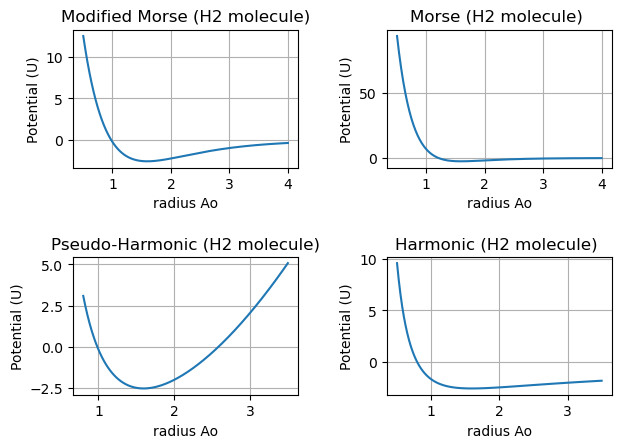

In [4]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x_list0,ModifiedMorse(x_list0))
plt.title("Modified Morse (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2,2,2)
plt.plot(x_list0,Morse(x_list0))
plt.title("Morse (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x_list1,Pseudoharmonic(x_list1))
plt.title("Pseudo-Harmonic (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x_list2,harmonic(x_list2))
plt.title("Harmonic (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

fig.tight_layout(pad=1.85)

plt.show()

In [5]:
def FuncF(r,y,z):
    return z 
    
def FuncG(r,y,z,V):
    return y*( E - V(r) ) * (-420.9867551) 

def rk4(N,r0,r1,y0,z0,f,g,V):
    
    h = (r1-r0) / N 
    r = r0
    y = y0 
    z = z0 
   
    r_values = [r]
    y_values = [y]
    z_values = [z]
    
    for i in range(1,N + 1):
        
        k1 = h*f(r,y,z)
        l1 = h*g(r , y , z , V)
        
        l2 = h*g(r + 0.5*h , y + 0.5*k1 , z + 0.5*l1 , V)
        k2 = h*f(r + 0.5*h , y + 0.5*k1 , z + 0.5*l1)
        
        l3 = h*g(r + 0.5*h , y + 0.5*k2 , z + 0.5*l2 , V )
        k3 = h*f(r + 0.5*h , y + 0.5*k2 , z + 0.5*l2)
        
        l4 = h*g(r + h , y + k3 , z + l3 , V)    
        k4 = h*f(r + h , y + k3, z + l3)
        
        # Updating values 
        r = r + h
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        z = z + (l1 + 2*l2 + 2*l3 + l4)/6
        
        # Updating values into arrays
        r_values.append(r)
        y_values.append(y)
        z_values.append(z)
        
    return np.array([r_values,y_values,z_values])

In [6]:
# Testing data using Modified Morse Potential 

# n = 0 , l = 0 

E = -2.42886321
r_initial = 0.1
r_final = 2.2
y_initial = 0
z_initial = 1e-31
N = 100
l = 0 


num = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,ModifiedMorse)

# n = 1 , l = 0 

E = -2.26054805
r_initial = 0.1
r_final = 2.2
y_initial = 0
z_initial = 1e-31
N = 100
l = 0 


num1 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,ModifiedMorse)

# n = 1 , l = 1 

E = -2.25875559
r_initial = 0.1
r_final = 2.2
y_initial = 0
z_initial = 1e-31
N = 100
l = 1 

num2 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,ModifiedMorse)

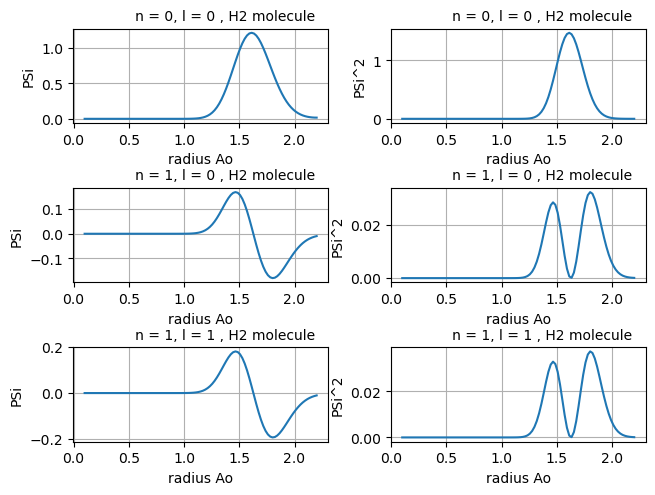

In [7]:
# Create subplots using Modified Morse Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , H2 molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()

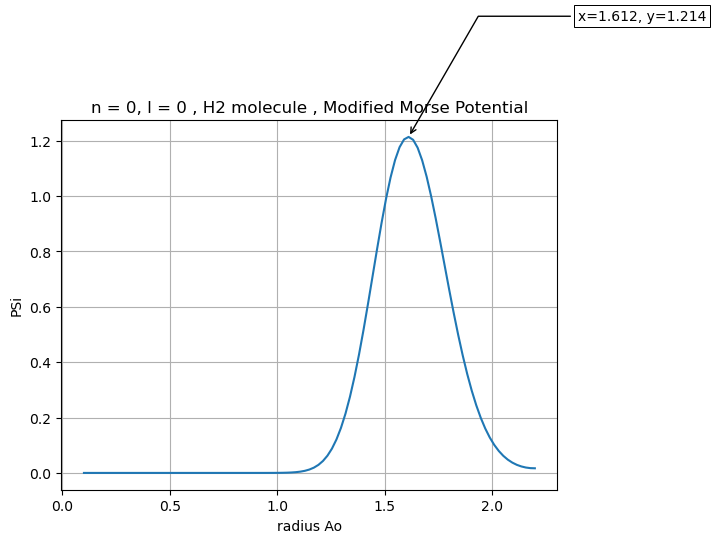

In [8]:
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , H2 molecule , Modified Morse Potential')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()

In [9]:
# Testing data using Morse Potential 

# n = 0 , l = 0 

E = -2.377542886321
r_initial = 0.1
r_final = 2
y_initial = 0
z_initial = 1e-77
N = 150
l = 0 


num = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Morse)

# n = 1 , l = 0 

E = -2.109054805
r_initial = 0.1
r_final = 2
y_initial = 0
z_initial = 1e-73
N = 120
l = 0 


num1 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Morse)

# n = 1 , l = 1 

E = -2.1059925875559
r_initial = 0.1
r_final = 2
y_initial = 0
z_initial = 1e-73
N = 120
l = 1 

num2 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Morse)

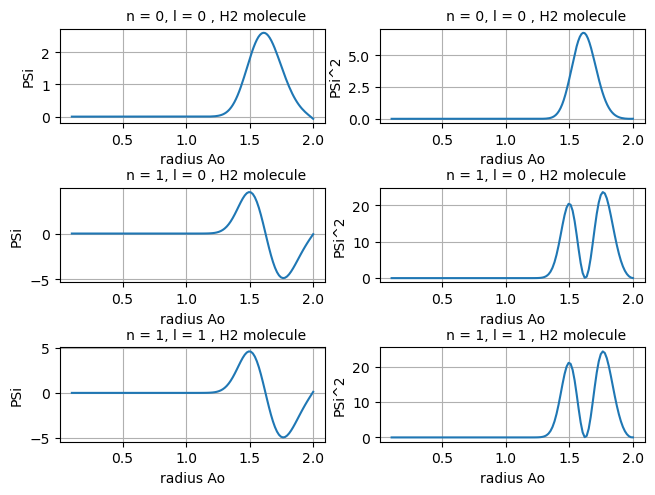

In [10]:
# Create subplots using Morse Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , H2 molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()

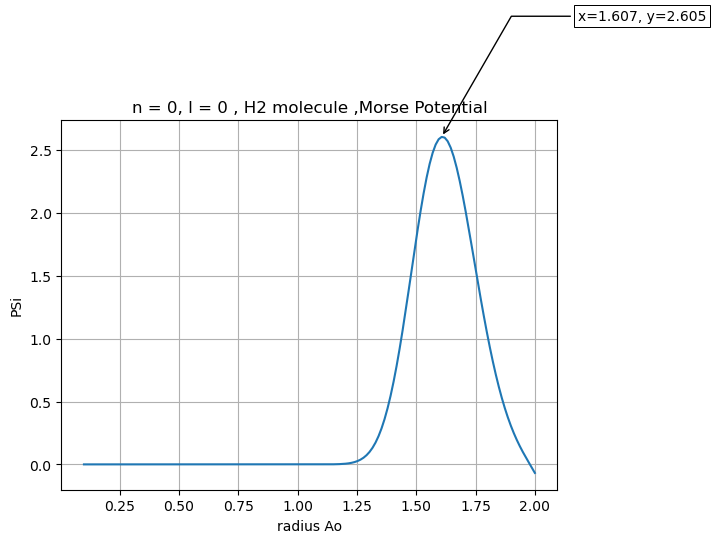

In [11]:
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , H2 molecule ,Morse Potential')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()

In [12]:
# Testing data using Harmonic Potential 

# n = 0 , l = 0 

E = -2.4653225310886321
r_initial = 0.1
r_final = 2.1
y_initial = 0
z_initial = 1e-34
N = 100
l = 0 


num = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,harmonic)

# n = 1 , l = 0 

E = -2.360886321
r_initial = 0.1
r_final = 2.1
y_initial = 0
z_initial = 1e-34
N = 100
l = 0 


num1 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,harmonic)

# n = 1 , l = 1 

E = -2.3590886321
r_initial = 0.1
r_final = 2.1
y_initial = 0
z_initial = 1e-34
N = 100
l = 1 

num2 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,harmonic)

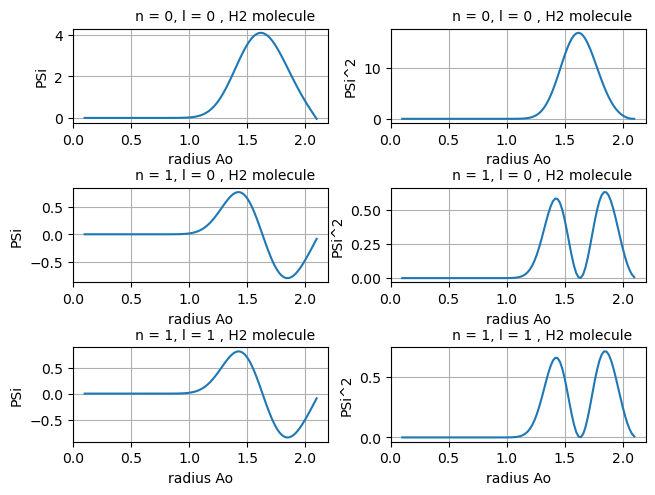

In [13]:
# Create subplots using Harmonic Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , H2 molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()

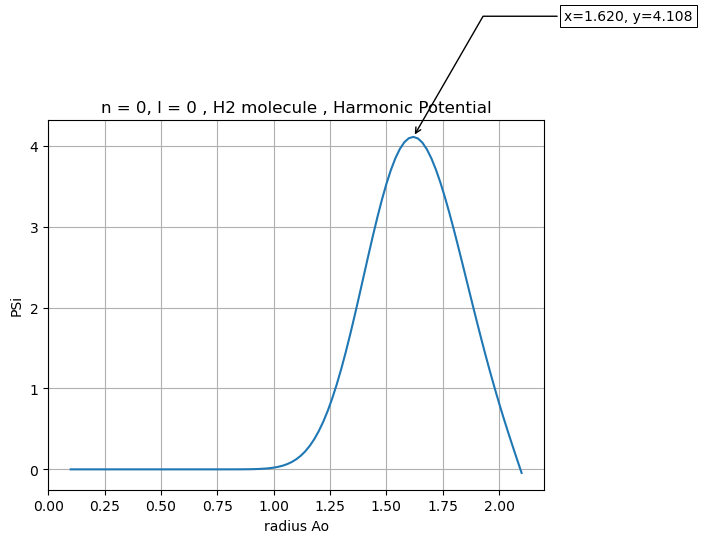

In [14]:
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , H2 molecule , Harmonic Potential')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()

In [15]:
# Testing data using Pseudo Harmonic Potential 

# n = 0 , l = 0 

E = -2.4181321
r_initial = 0.1
r_final = 2.1
y_initial = 0
z_initial = 1e-44
N = 100
l = 0 


num = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Pseudoharmonic)

# n = 1 , l = 0 

E = -2.2179900701290054805
r_initial = 0.1
r_final = 2
y_initial = 0
z_initial = 1e-42
N = 100
l = 0 


num1 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Pseudoharmonic)

# n = 1 , l = 1 

E = -2.2169900701290054805
r_initial = 0.1
r_final = 2
y_initial = 0
z_initial = 1e-44
N = 100
l = 1 

num2 = rk4(N,r_initial,r_final,y_initial,z_initial,FuncF,FuncG,Pseudoharmonic)

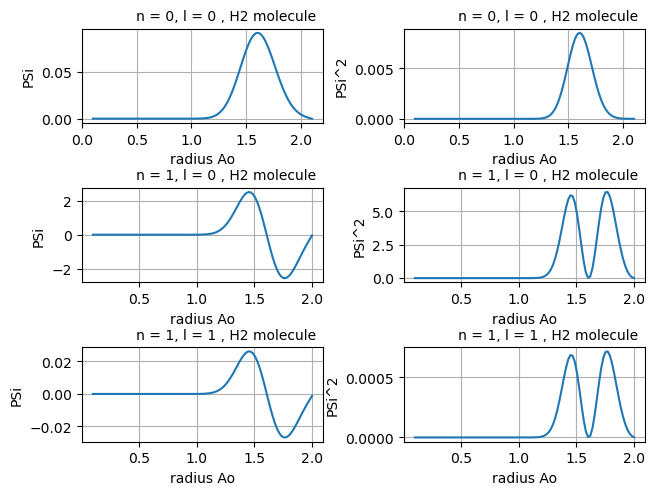

In [16]:
# Create subplots using Pseudo Harmonic Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , H2 molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , H2 molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()

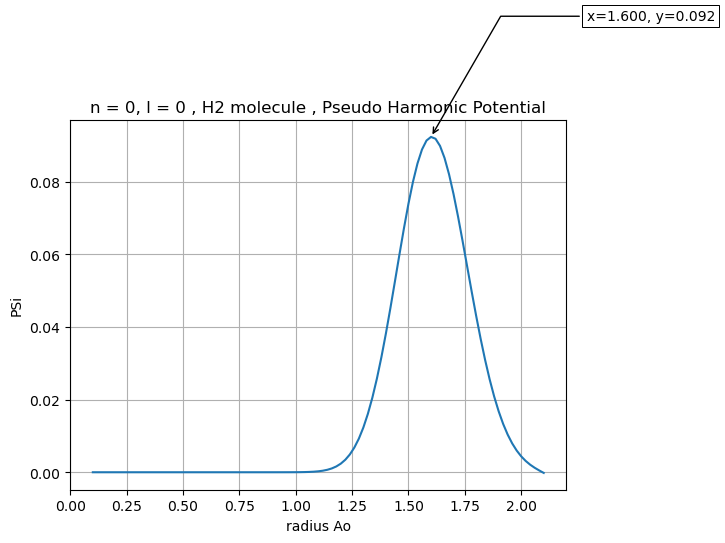

In [17]:
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , H2 molecule , Pseudo Harmonic Potential')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()